# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [x] Inspect the shapes of the training and test sets to confirm their size and structure.
- [x] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [x] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist

# Set Python built-in random seed
import random
random.seed(42)

# Set NumPy random seed
import numpy as np
np.random.seed(42)

# Set TensorFlow random seed
import tensorflow as tf
tf.random.set_seed(42)

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
# Inspect the shapes of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


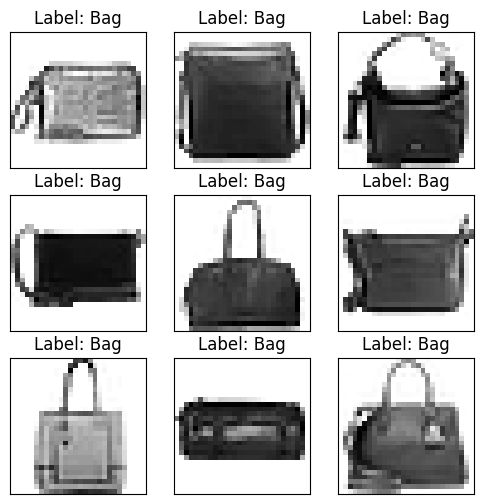

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected

y_indices = np.argmax(y_train, axis=1)

# Randomly select 9 samples from class 9 (Ankle boot)
random_indices = np.random.choice(np.where(y_indices == 8)[0], 9, replace=False)

# Create 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    img = X_train[random_indices[i]]
    label_index = y_indices[random_indices[i]]
    class_name = class_names[label_index]

    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {class_name}")
    ax.set_xticks([])
    ax.set_yticks([])


    
plt.show()


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

> The data looks as expected. The images sample is 28×28 meeting the dataset’s specifications. The clothing items are in general recognizable (the important features remains). However, I've noticed that some classes look very  similar (Shirt, T-shirt/top, and some dresses), which could lead to misclassifications.  


# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical


# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))  # Flatten 28x28 image to 784
model.add(Dense(10))                      # Output layer with 10 units (no activation)


# Compile the model using `model.compile()`
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(from_logits=True),  # Because no softmax in output
    metrics=['accuracy']
)


# Train the model with `model.fit()`
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model with `model.evaluate()`
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
 
print(f"Test Accuracy: {test_accuracy:.4f}")

/opt/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.7398 - loss: 0.7806 - val_accuracy: 0.8245 - val_loss: 0.5034
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.8400 - loss: 0.4701 - val_accuracy: 0.8341 - val_loss: 0.4736
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.8491 - loss: 0.4390 - val_accuracy: 0.8379 - val_loss: 0.4622
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.8544 - loss: 0.4238 - val_accuracy: 0.8405 - val_loss: 0.4563
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.8574 - loss: 0.4144 - val_accuracy: 0.8420 - val_loss: 0.4530
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.8586 - loss: 0.4077 - val_accuracy: 0.8423 - val_loss: 0.4509
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.8603 - loss: 0.4026 - val_accuracy: 0.8428 - val_loss: 0.4496
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - accuracy: 0.8615 -

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**
> The baseline model achieved an accuracy of **0.84**, which is quite good for a linear classifier. Without hidden layers or non-linearities, the model struggles to capture patterns in the images. While it performs better than random guessing, its limitations highlight the need for more advanced architectures (like CNN) to improve accuracy on image classification tasks.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [5]:
from keras.layers import Conv2D, MaxPooling2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
# Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(10)) 

# Compile the model
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10


/opt/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8065 - loss: 0.5505 - val_accuracy: 0.8856 - val_loss: 0.3262
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8962 - loss: 0.2897 - val_accuracy: 0.8924 - val_loss: 0.3010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9103 - loss: 0.2443 - val_accuracy: 0.8957 - val_loss: 0.2910
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9218 - loss: 0.2131 - val_accuracy: 0.8998 - val_loss: 0.2916
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9311 - loss: 0.1870 - val_accuracy: 0.9000 - val_loss: 0.2974
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9406 - loss: 0.1641 - val_accuracy: 0.9041 - val_loss: 0.3002
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9483 - loss: 0.1431 - val_accuracy: 0.9007 - val_loss: 0.3237
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9549 - loss: 0.1266 - val_accurac

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
>Yes, the CNN model outperformed the baseline model. While the baseline achieved an accuracy of **0.84**, the CNN reached **0.9077**, showing a significant improvement. This is due to the CNN’s ability to learn spatial features through convolutional and pooling layers, which the linear model could not capture.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [6]:
# A. Test Hyperparameters

# Filter sizes to test
filter_values = [8, 16,32, 64, 128]
results_filters = {}

for filters in filter_values:
    print(f"\nTraining with {filters} filters...")
    
    # Define a fresh model for each run
    model = Sequential()
    model.add(Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10))
    
    model.compile(optimizer=Adam(),
                  loss=CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    # Train and evaluate
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    results_filters[filters] = test_acc
    print(f"Test accuracy with {filters} filters: {test_acc:.4f}")


Training with 8 filters...
Test accuracy with 8 filters: 0.8998

Training with 16 filters...
Test accuracy with 16 filters: 0.9028

Training with 32 filters...
Test accuracy with 32 filters: 0.9010

Training with 64 filters...
Test accuracy with 64 filters: 0.9021

Training with 128 filters...
Test accuracy with 128 filters: 0.9061


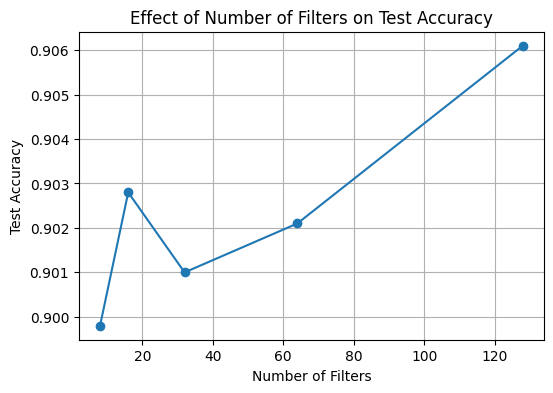

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(list(results_filters.keys()), list(results_filters.values()), marker='o')
plt.title('Effect of Number of Filters on Test Accuracy')
plt.xlabel('Number of Filters')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

In [8]:
# B. Test presence or absence of regularization
from tensorflow.keras.layers import Dropout

results_dropout = {}

for use_dropout in [False, True]:
    print(f"\nTraining with dropout = {use_dropout}")
    
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    if use_dropout:
        model.add(Dropout(0.5))  # Apply dropout only when enabled
    model.add(Dense(10))
    
    model.compile(optimizer=Adam(),
                  loss=CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    results_dropout["With Dropout" if use_dropout else "Without Dropout"] = test_acc
    print(f"Test accuracy ({'Dropout' if use_dropout else 'No Dropout'}): {test_acc:.4f}")


Training with dropout = False
Test accuracy (No Dropout): 0.9034

Training with dropout = True
Test accuracy (Dropout): 0.8935


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

> Among the models tested, increasing the number of filters from 8 to 16 led to the best performance, with a test accuracy of **0.9110** (I've noticed that with each run the accuarcy may vay). This suggests that using more filters helped the model learn richer feature representations. However, adding more filters beyond 16 did not yield significant improvements and sometimes slightly reduced performance, possibly due to overfitting or redundancy in feature extraction.

In terms of regularization, adding dropout slightly decreased performance (from **0.9069** to **0.8970**), indicating that for this specific model and training setup, dropout may have hindered learning rather than helping generalization.

The best performance was achieved with 16 filters and no dropout, suggesting that a moderately complex model without additional regularization was optimal in this case. This balance likely allowed the network to capture meaningful patterns without overcomplicating the architecture.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [9]:
import tensorflow as tf
from sklearn.metrics import classification_report

final_model = Sequential()
final_model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Flatten())
final_model.add(Dense(64, activation='relu'))
final_model.add(Dense(10))  

# Compile the model
final_model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
final_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate the model
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")

# Optional: detailed classification report
y_pred_logits = final_model.predict(X_test)
y_pred = tf.argmax(y_pred_logits, axis=1)
y_true = tf.argmax(y_test, axis=1)

print("\n🔍 Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8009 - loss: 0.5770 - val_accuracy: 0.8819 - val_loss: 0.3371
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8923 - loss: 0.3023 - val_accuracy: 0.8920 - val_loss: 0.3049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9063 - loss: 0.2577 - val_accuracy: 0.8986 - val_loss: 0.2858
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9175 - loss: 0.2262 - val_accuracy: 0.9035 - val_loss: 0.2770
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9258 - loss: 0.2014 - val_accuracy: 0.9038 - val_loss: 0.2740
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9341 - loss: 0.1799 - val_accuracy: 0.9064 - val_loss: 0.2762
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9417 - loss: 0.1611 - val_accuracy: 0.9044 - val_loss: 0.2838
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9487 - loss: 0.1443 - 

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

>The final model outperformed both the baseline linear model and the initial CNN. While the baseline achieved much lower accuracy and the simple CNN reached **0.9077**, the final model achieved **0.9110** by using 16 filters and no dropout. This improvement is likely due to the optimal balance between model complexity and generalization.


🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.